In [1]:
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.0 MB/s eta 0:00:00


In [2]:
!pip install -q youtube_transcript_api

In [3]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi


In [18]:
youtube_video = "https://www.youtube.com/watch?v=A1I1fBXr0rc"

In [19]:
video_id = youtube_video.split("=")[1]

In [20]:
video_id

'A1I1fBXr0rc'

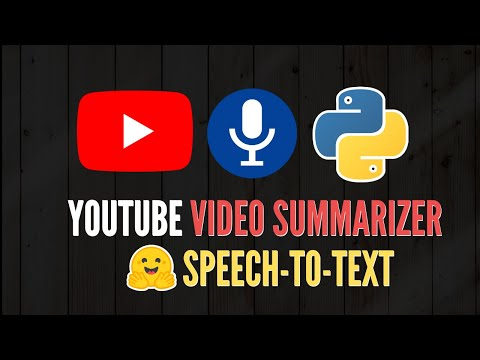

In [21]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [22]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)


In [23]:
transcript[0:5]

[{'text': "hey what's up coders welcome to one",
  'start': 0.0,
  'duration': 4.16},
 {'text': 'little coder in this applied nlp', 'start': 2.0, 'duration': 4.399},
 {'text': "tutorial we're going to create a project",
  'start': 4.16,
  'duration': 4.64},
 {'text': "that's quite popular all over", 'start': 6.399, 'duration': 4.481},
 {'text': 'the python ecosystem so the project that',
  'start': 8.8,
  'duration': 3.919}]

In [24]:

result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

24814


In [25]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [26]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("input text \n" + result[start:end])
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarized_text.append(out)

#print(summarized_text)

input text 
 hey what's up coders welcome to one little coder in this applied nlp tutorial we're going to create a project that's quite popular all over the python ecosystem so the project that we're going to do in this tutorial is youtube video summarization unlike most youtube video summarization tutorials that take the caption of the youtube video where you can you know you know youtube api allows you to download the caption and then summarize it we're going to actually perform a speech recognition we're going to actually convert the speech the audio into text and then do the summarization so for uh i've never seen a tutorial like this thing i'm not exaggerating but i have literally not seen a tutorial like this while i was preparing for this video so in this video what we're going to actually do is we're going to take the entire speech of the video or from youtube and then convert that speech into text and then summarize the text so as you might have rightly guessed this video has 

In [27]:
len(str(summarized_text))

8605

In [28]:
str(summarized_text)

'[" In this tutorial we\'re going to create a project that\'s quite popular all over the python ecosystem . The project is youtube video summarization . Unlike most youtube tutorials that take the caption of the youtube video  and then summarize it we are going to actually perform a speech recognition . We\'re going on to convert the speech the audio into text and then do the summarization.", " i\'m using a google collab environment with jpu so you can see that i have got gpu hardware accelerated on . i would strongly encourage you to subscribe to the channel so that you can get the notification of any new video without further ado let\'s get started .", " The longer the length of your video becomes the longer your summarization task is going to take and also the more expensive your computational resources are going to be what do i mean by that . If your video is one minute maybe your summarizing task will take less than a minute . If you have gpu it\'s going to get executed faster so 